In [58]:
import sys

In [59]:
#print(sys.path)

In [60]:
import hana_ml

In [61]:
import os

In [62]:
#print(os.getenv("PYTHONHOME", 0))

In [63]:
import string
vcapsvcs_str = vcapsvcs_str.translate( { ord(c):None for c in ' \n\t\r' } )

In [64]:
print(vcapsvcs_str)

{"xsuaa":[{"name":"python-ml-uaa","label":"xsuaa","tags":["xsuaa"],"plan":"default","credentials":{"tenantmode":"dedicated","clientid":"sb-na-193ff3e7-922d-4068-969d-1b0f53aa7951","verificationkey":"-----BEGINPUBLICKEY-----MIIBIjANBgkqhkiG9w0BAQEFAAOCAQ8AMIIBCgKCAQEAsYtDBo6f+SHpxVJ+2fwnIVdSzrbuoP6lFYRfZ29soZ0XSw51IHoa3ew4t8Ep7d15ua3r7ZZCf3wteGkSO+0QdcJwak0lAEygdD9uVlANLZmu9jZMKmOcn/65XDyn++YJWQt2o5AS6Kz4XLQGSOVReQbfchcMiqJhebCtEAFTb0oYtxYjGY4dWqGnJFpv2iL/oRs304JGogaxz7cUzQiUkLDK6/elsbWAtvu+H6R1vitt/EEsHkYh3+/V5/Rf3+G16IKxIFQxIwZOR5pk1CMll1inm/Ya7Z2n5nrxs5vglyuV0oThqWxKEtNQGPG6990hOnHoMYu8JXPshL07HreIkwIDAQAB-----ENDPUBLICKEY-----","xsappname":"na-193ff3e7-922d-4068-969d-1b0f53aa7951","identityzone":"uaa","identityzoneid":"uaa","clientsecret":"m63m25atIbQs27NnuOFoqeKqDhGxTxjvQW4m52hfSxDlJPuBrQQSaZQ6QPqpyE0jtzLorajiqTv0VTCiddMUMw==","url":"https://hxehost:39032/uaa-security"}}],"hana":[{"name":"python-ml-hdi","label":"hana","tags":["hana","database","relational"],"plan":"hdi-shared","cre

In [37]:
os.environ['VCAP_SERVICES'] = vcapsvcs_str

In [31]:
vcapsvcs = json.loads(vcapsvcs_str)

In [38]:
from cfenv import AppEnv
env = AppEnv()
hana = env.get_service(label='hana')

In [41]:
schema = hana.credentials['schema']
host = hana.credentials['host']
port = hana.credentials['port']
user = hana.credentials['user']
password = hana.credentials['password']

In [44]:
output = "Key VCAP_SVCS values.\n\n"
output += 'host: ' + hana.credentials['host'] + '\n'
output += 'port: ' + hana.credentials['port'] + '\n'
output += 'schema: ' + hana.credentials['schema'] + '\n'
output += 'user: ' + hana.credentials['user'] + '\n'
output += 'pass: ' + hana.credentials['password'] + '\n'
print(output)

Key VCAP_SVCS values.

host: hxehost
port: 39013
schema: E4BA032547384A4C82CC3460445F2AA2
user: E4BA032547384A4C82CC3460445F2AA2_BHLD7OT0V73FGWXWR6IDK0ZDQ_RT
pass: Sb9x_0U165lN0_YkomXdAI.Qp1P8nauMYrE_mOOK-Xrvc5CPd.LXFH-on3xvW.esSf3SkAJh97B-gSizdght9xnGKTI28G0nEYoJt-N4j12RBqXh0LYoHQBf7aSSXZEl



In [53]:
import numpy as np
from sklearn import datasets
# Load the diabetes dataset
diabetes = datasets.load_diabetes()
# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]
diabetes
#diabetes_X

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [54]:
from sklearn.datasets import load_digits
digits = load_digits()

In [55]:
print(digits.data.shape)
(1797, 64)

(1797, 64)


(1797, 64)

<Figure size 432x288 with 0 Axes>

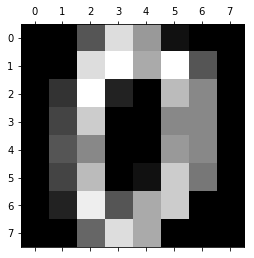

In [57]:
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 